In [1]:
! pip install dabl


You should consider upgrading via the 'C:\Users\gouthaman\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import warnings  # helps to remove warnings 

import numpy as np
import pandas as pd

## Visualization Liabraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabl as db

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics



import joblib

warnings.filterwarnings('ignore')  # setting no warnings inside the notebook 

from sklearn.pipeline import Pipeline

In [3]:
url = "F:\\TMLC\BlueBerry Prediction\\Dataset\\WildBlueberryPollinationSimulationData.csv"

df = pd.read_csv(url)
df1 = df.copy()

#pd.melt(df1)

## EDA

In [4]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [5]:
df.drop(columns="Row#",inplace=True)

In [6]:
df.sample(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
545,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.518626,0.460896,37.453467,6370.898867
137,12.5,0.25,0.25,0.38,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.387351,0.394915,30.127376,4016.361596
119,12.5,0.25,0.25,0.25,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.559094,0.476536,39.139916,6673.303998
345,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.488014,0.437317,34.781055,5675.721494
424,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.522435,0.457946,37.033298,5954.513153


In [7]:
df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [8]:
df.duplicated().any()

False

### Univariate Analysis 


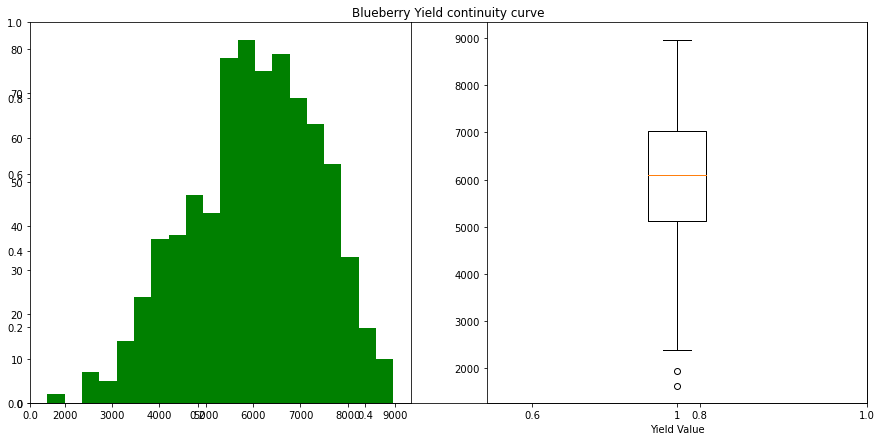

In [9]:
#Yeild - Target

figs = plt.figure(figsize=(15,7))
plt.title("Blueberry Yield continuity curve")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = df["yield"]
plt.xlabel("Yield Value")
ax1.hist(x,bins=20,color='green')
ax2.boxplot(x)
plt.show()

#### Ploting the distribution of each variable

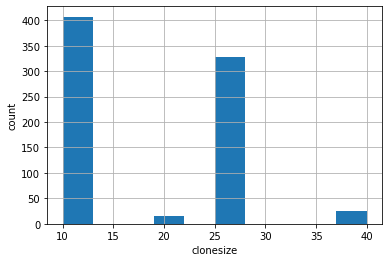

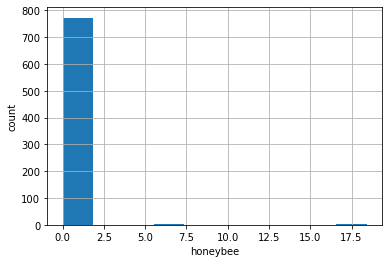

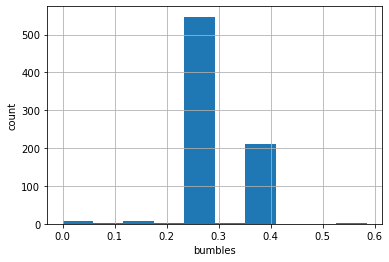

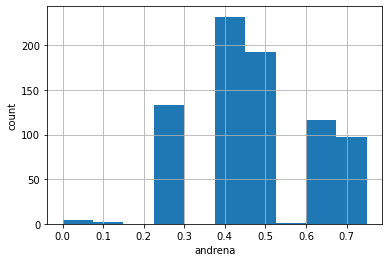

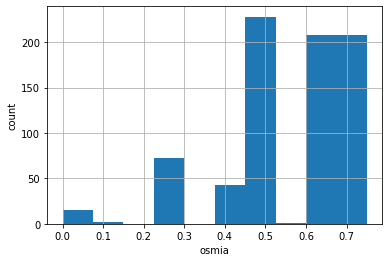

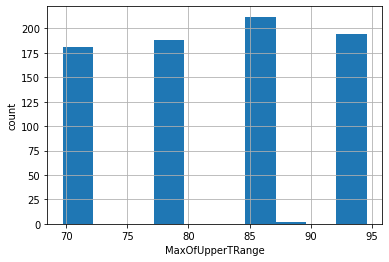

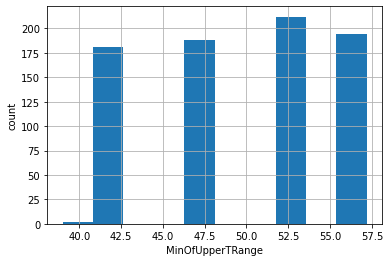

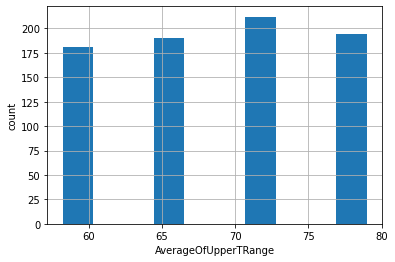

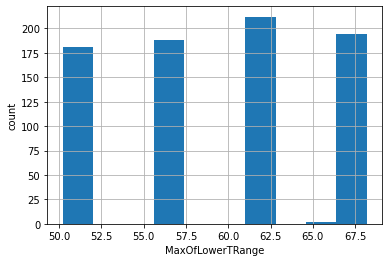

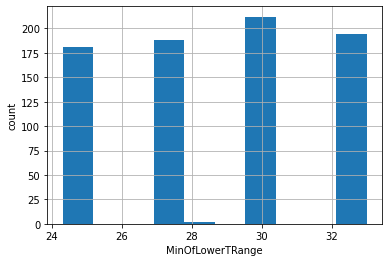

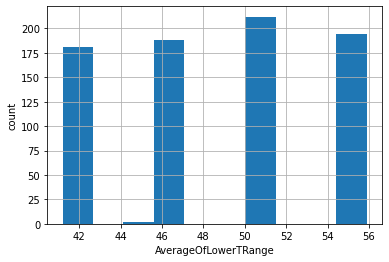

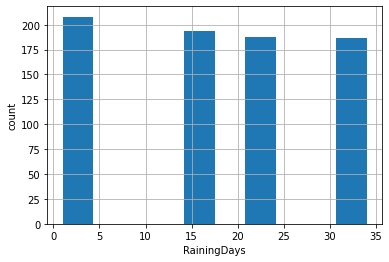

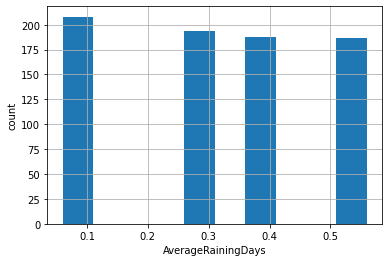

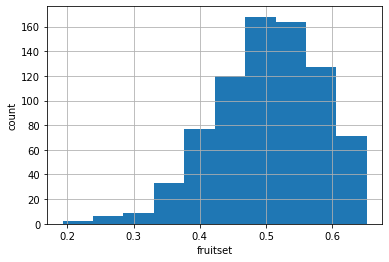

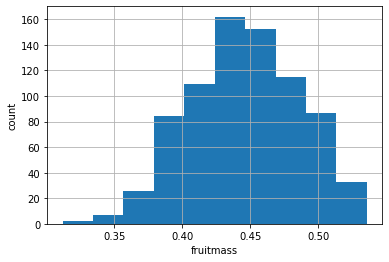

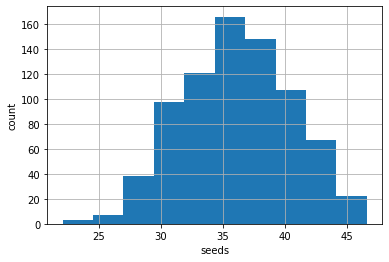

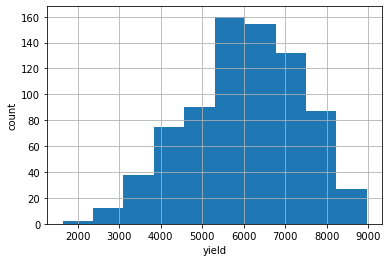

In [10]:
for i in df.columns:
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

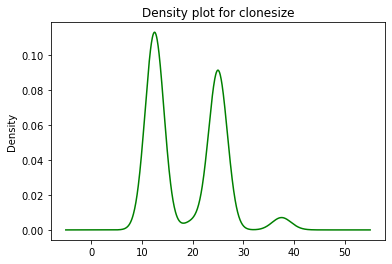

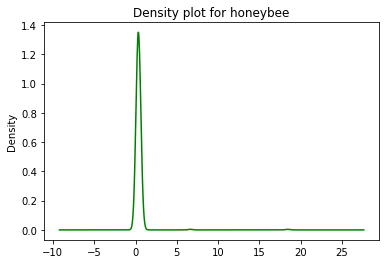

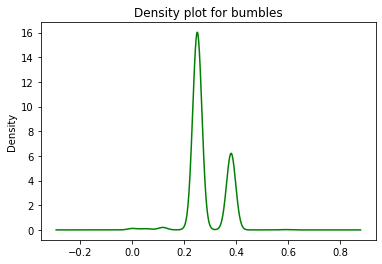

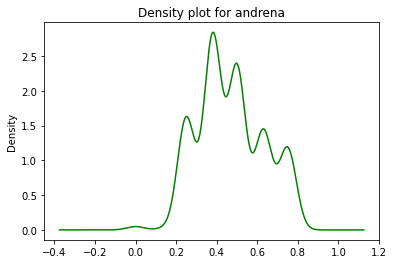

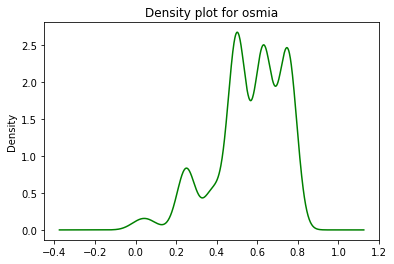

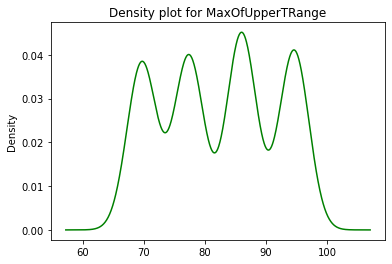

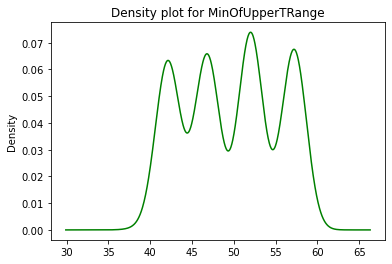

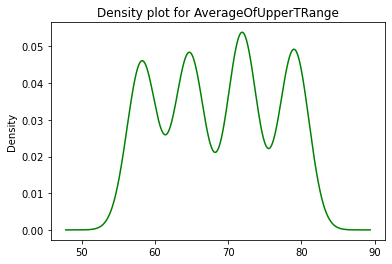

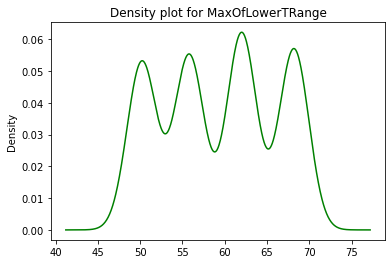

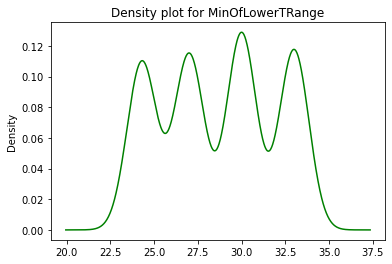

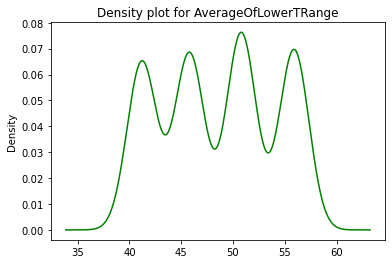

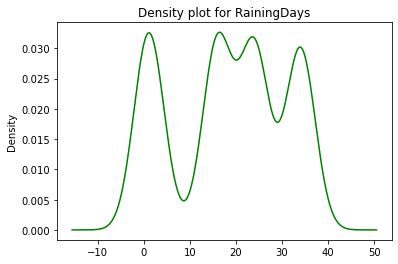

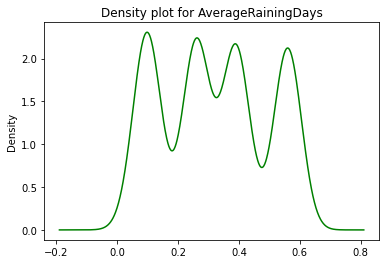

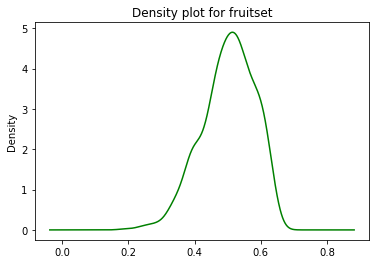

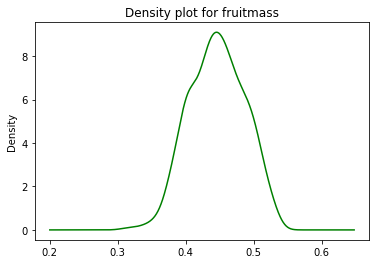

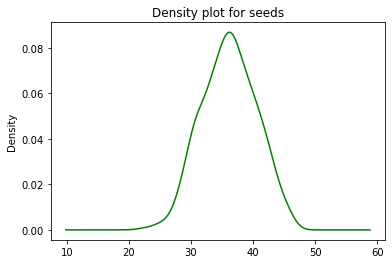

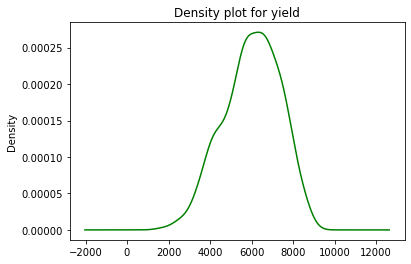

In [11]:
for i in df.columns:
    df[i].plot.density(color='green')
    plt.title('Density plot for {}'.format(i))
    plt.show()

##### Observation:

    Fruitset, fruitmass and Seeds are normally distibuted.
    Target variable yield is also normally distibuted

    
    

Lets use Box plot to find if there are any outliers

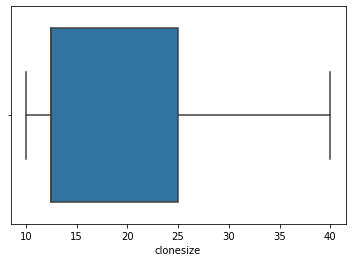

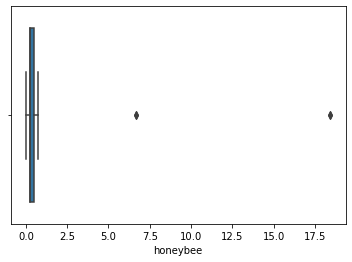

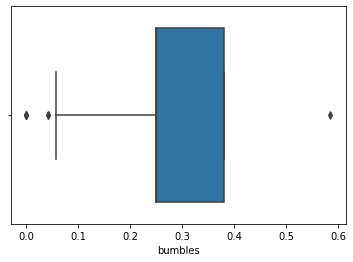

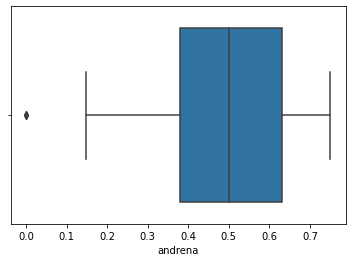

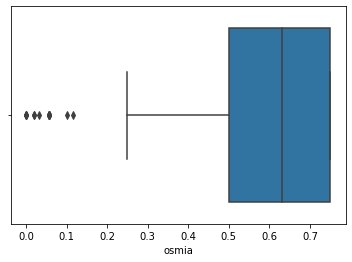

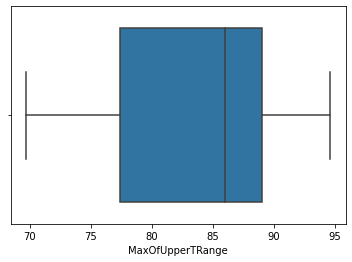

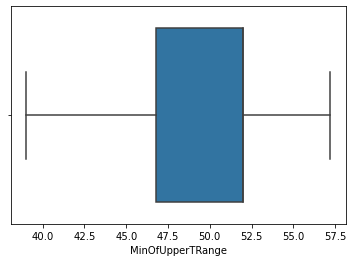

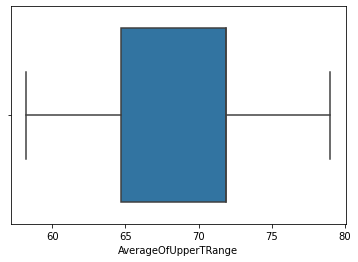

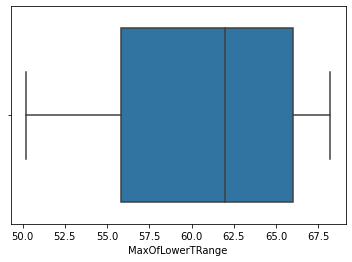

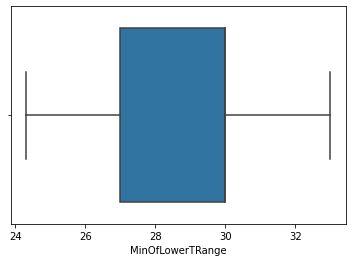

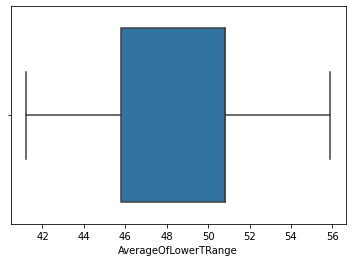

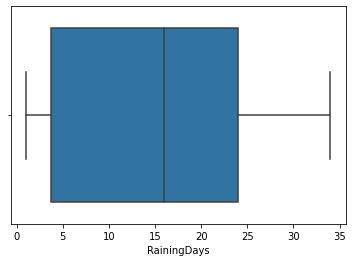

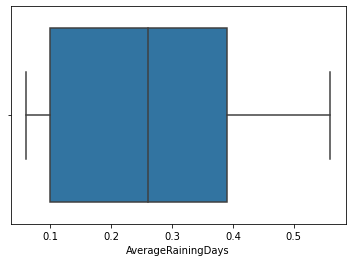

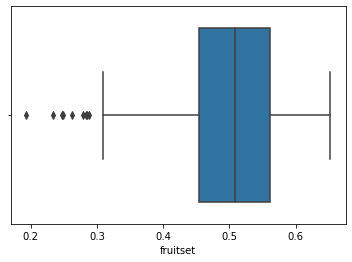

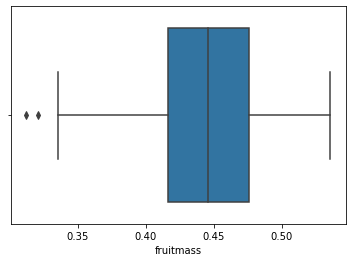

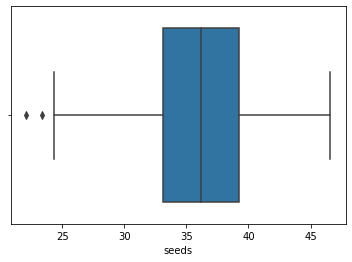

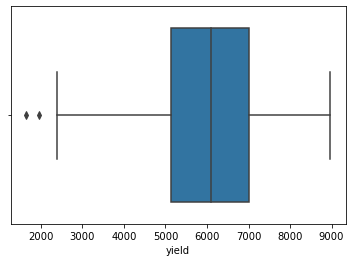

In [12]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

##### Outliers present in  Honeybee, Bumbles,Andrena,Osmia, fruitset,fruitmass,seeds have outliers

### Multivariate Analysis 

Plotting predictors against target "yield"

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.38E+04'}, xlabel='fruitset', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=9.42E+03'}, xlabel='seeds'>,
         <AxesSubplot:title={'center':'F=4.99E+03'}, xlabel='fruitmass'>,
         <AxesSubplot:title={'center':'F=3.21E+02'}, xlabel='AverageRainingDays'>],
        [<AxesSubplot:title={'center':'F=3.19E+02'}, xlabel='RainingDays', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.82E+02'}, xlabel='clonesize'>,
         <AxesSubplot:title={'center':'F=1.32E+02'}, xlabel='osmia'>,
         <AxesSubplot:title={'center':'F=8.20E+01'}, xlabel='bumbles'>],
        [<AxesSubplot:title={'center':'F=2.82E+01'}, xlabel='MaxOfLowerTRange', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.81E+01'}, xlabel='MaxOfUpperTRange'>,
         <AxesSubplot:title={'center':'F=2.70E+01'}, xlabel='MinOfLowerTRange'>,
         <AxesSubplot:title={'center':'F=2.65E+01'}, xlabel='AverageOfUpperTRange'>],
        [<AxesSubplot:title={

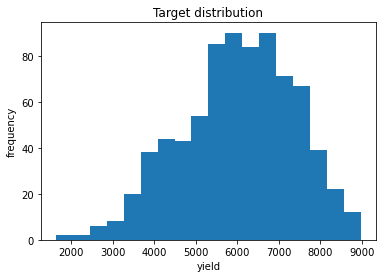

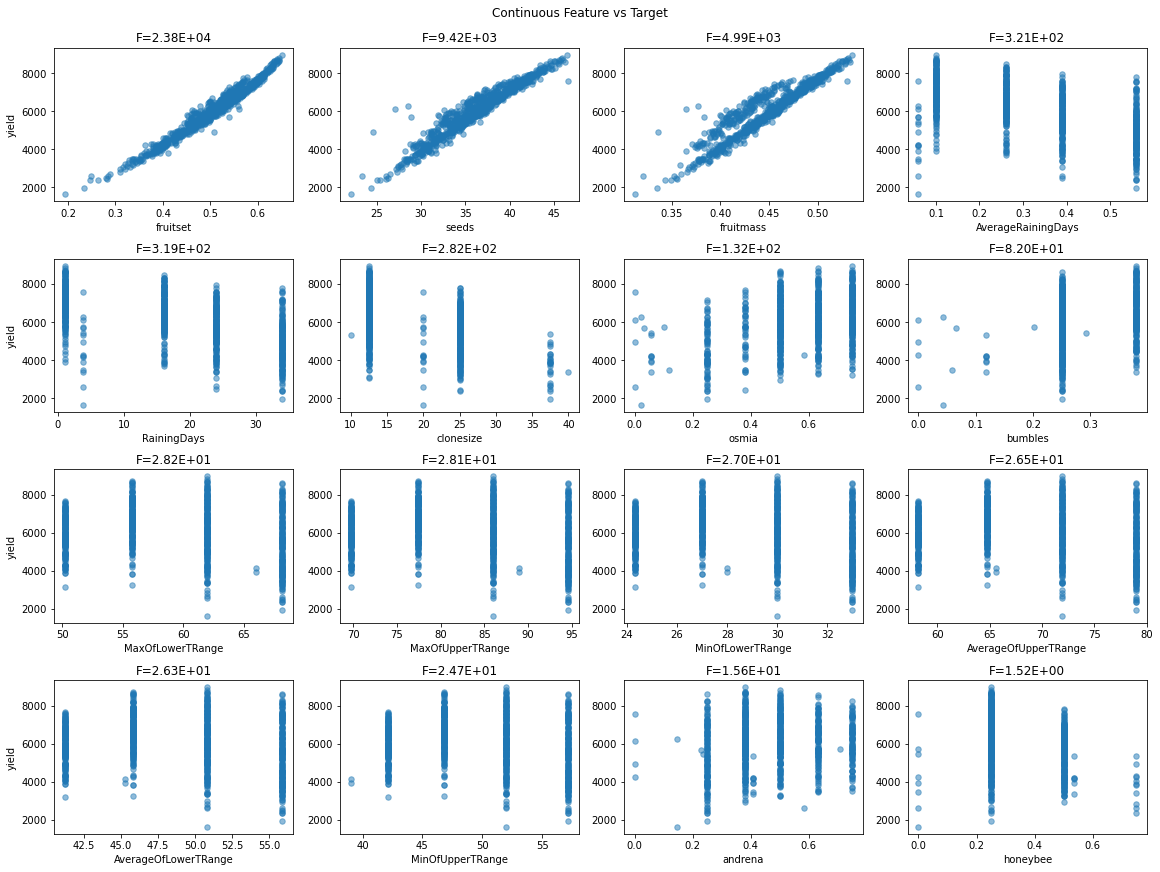

In [13]:
db.plot(df,'yield')

In [14]:
#correlation plot
correlation_matrix = df.corr()
df1 =correlation_matrix.loc[:,["yield"]] 
df1.sort_values(by="yield")

,yield
AverageRainingDays,-0.541215
RainingDays,-0.540069
clonesize,-0.516737
MaxOfLowerTRange,-0.187439
MaxOfUpperTRange,-0.187075
MinOfLowerTRange,-0.183339
AverageOfUpperTRange,-0.181774
AverageOfLowerTRange,-0.181293
MinOfUpperTRange,-0.175883
honeybee,-0.044250


#### Observation:
  
Highly correlated variables with Yield 
    
    AverageRainingDays	-0.541215
    RainingDays	-0.540069
    clonesize	-0.516737
    
    fruitmass	0.930365
    seeds	0.961249
    fruitset	0.984081
    

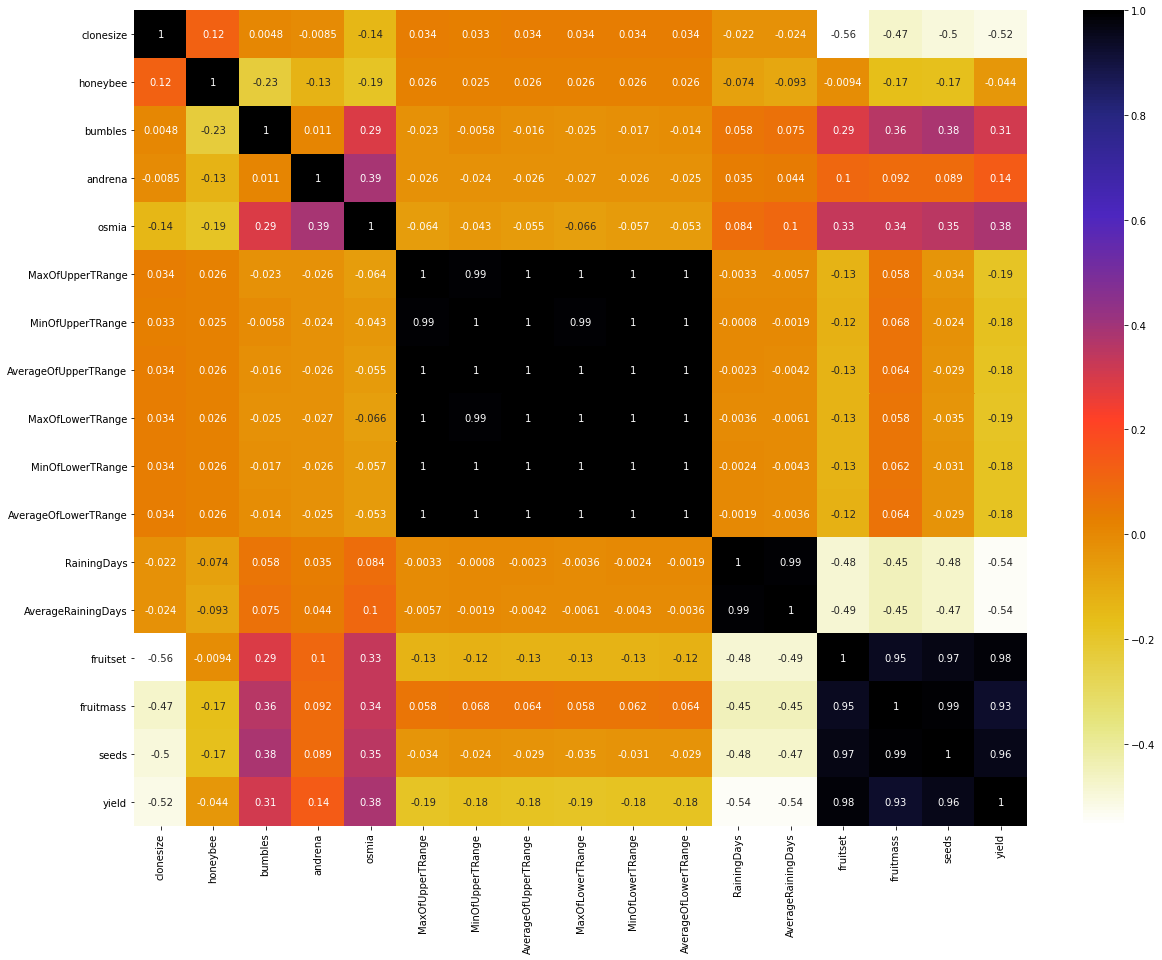

In [15]:
plt.figure(figsize=(20,15))


sns.heatmap(data=correlation_matrix, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
df = df.drop(columns=[ 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'])


In [17]:
df.columns

Index(['clonesize', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange',
       'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset', 'fruitmass',
       'seeds', 'yield'],
      dtype='object')

### Preprocessing Step

###  No Missing values

In [18]:
part1 = df.drop(columns='yield')
part2 = df['yield']


### Treating Outliers

In [19]:
def outlier_treatment(df,ft):
    q1 = df[ft].quantile(0.25)
    q2 = df[ft].quantile(0.5)
    q3 =df[ft].quantile(0.75)
    iqr = q3 -q1
  
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr

    ls = df.index[(df[ft]<lower)|(df[ft]>upper)]

    return ls

In [20]:
index_list=[]
for i in df.columns:
    index_list.extend(outlier_treatment(df,i))
list(set(index_list))
df_iqr = df.drop(index=index_list)

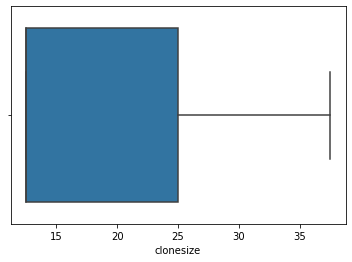

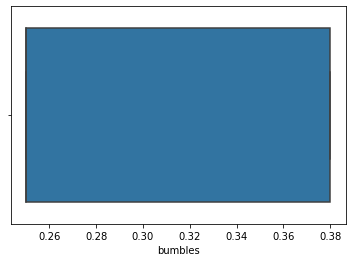

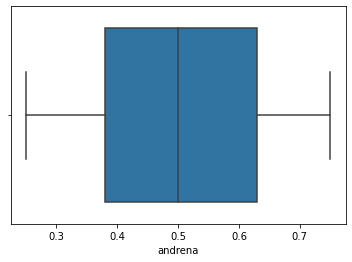

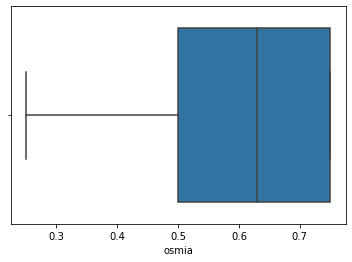

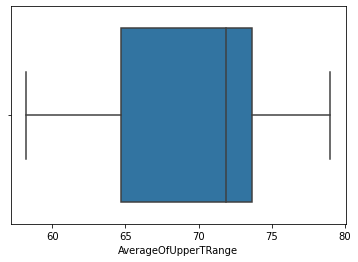

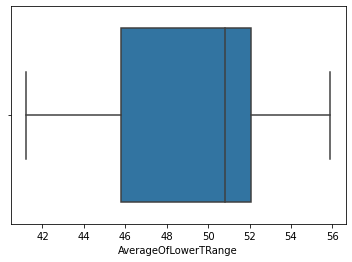

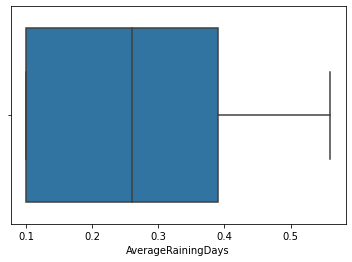

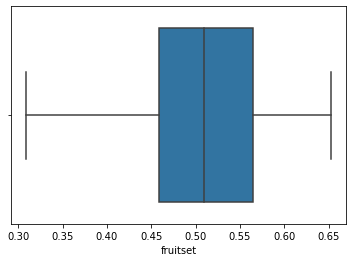

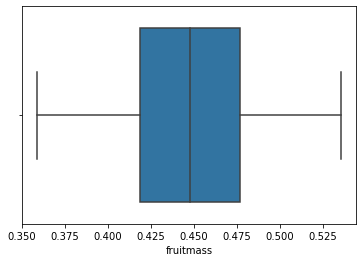

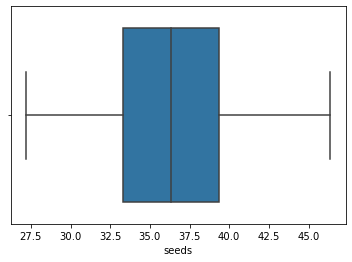

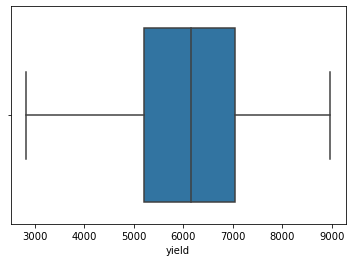

In [21]:
for i in df.columns:
    sns.boxplot(df_iqr[i])
    plt.show()

In [22]:
from scipy import stats
z = np.abs(stats.zscore(df))

df_zscore = df[(z < 3).all(axis=1)]
df_zscore.shape

(764, 11)

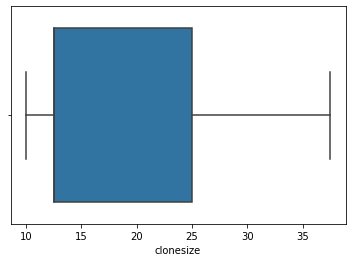

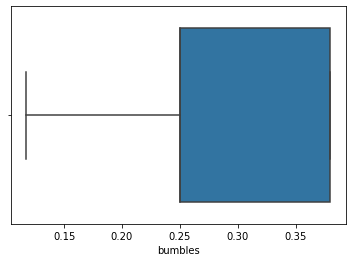

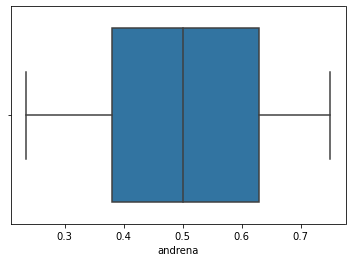

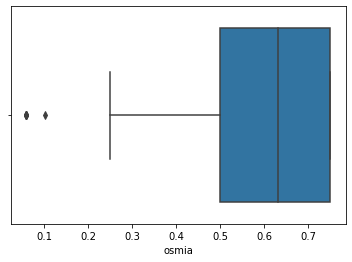

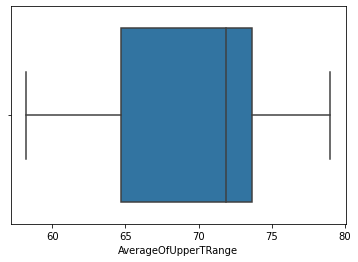

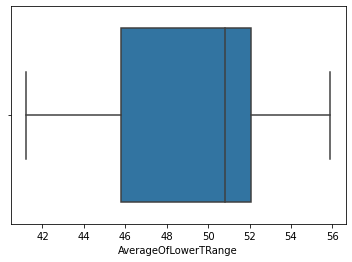

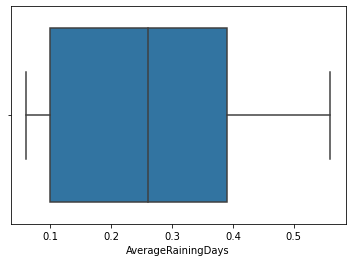

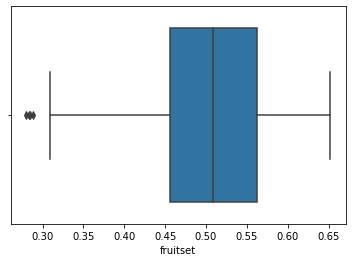

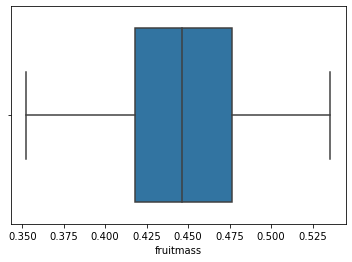

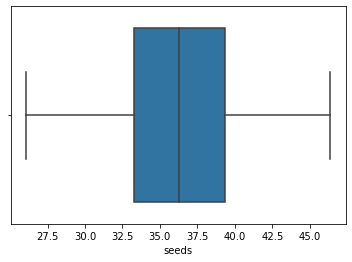

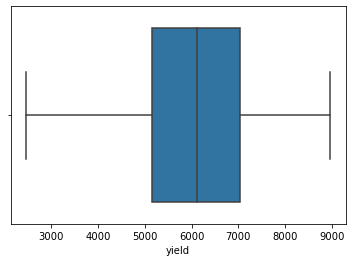

In [23]:
for i in df.columns:
    sns.boxplot(df_zscore[i])
    plt.show()

In [24]:
df = df_zscore

### Checking for skew

In [25]:
df.skew() #no big value of Skew

clonesize               0.551954
bumbles                 0.782278
andrena                 0.297028
osmia                  -0.782942
AverageOfUpperTRange    0.004925
AverageOfLowerTRange    0.015482
AverageRainingDays      0.068733
fruitset               -0.367408
fruitmass               0.012682
seeds                   0.042607
yield                  -0.245609
dtype: float64

### Preprocessing the Data


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

## Feature Selection

In [50]:
# Using Variance Threshold
#from sklearn.feature_selection import VarianceThreshold
#
#var_thr = VarianceThreshold(threshold = 0.2) #Removing both constant and quasi-constant
#var_thr.fit(X_tnscaled)
#mask =var_thr.get_support()
#feat=X_tnscaled.loc[:,mask].columns.to_list()
#feat
#

## Correlation

In [33]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr


In [34]:
def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [51]:

#X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_tnscaled, Y_train, X_tstscaled)
#X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_tnscaled, Y_train, X_tstscaled)

In [52]:
#X_train_info = pd.DataFrame(X_train_fs_info,columns=X_tnscaled.columns)
#X_train_corr = pd.DataFrame(X_train_fs_corr,columns=X_tnscaled.columns)

In [ ]:
def fs_score_plot(fs_func,X_t):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %s: %f' % (X_t.columns.to_list()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr,X_train_corr)
fs_score_plot(fs_info,X_train_info)

In [ ]:
sel_features = X_t.columns.to_list()[0:8]

In [ ]:
#def cor_selector(X, y,num_feats):
#    cor_list = []
#    
#    feature_name = X.columns.tolist()
#    
#    # calculate the correlation with y for each feature
#    for i in X.columns.tolist():
#        cor = np.corrcoef(X[i], y)[0, 1]
#        cor_list.append(cor)
#    
#    # replace NaN with 0
#    cor_list = [0 if np.isnan(i) else i for i in cor_list]
#    
#    # feature name
#    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
#   
#    # feature selection? 0 for not select, 1 for select
#    cor_support = [True if i in cor_feature else False for i in feature_name]
#    return cor_support, cor_feature
#
#num_feats=10
#cor_support, cor_feature = cor_selector(X_tnscaled, Y_train,num_feats)
#print(str(len(cor_feature)), 'selected features')
#
#print("-"*60)
#print("Selected Features")
#cor_feature

In [ ]:
#Using RFE

In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestRegressor
#rfe_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=num_feats, step=20, verbose=5)
#rfe_selector.fit(X_tnscaled, Y_train)
#rfe_support = rfe_selector.get_support()
#rfe_feature = X_tnscaled.loc[:,rfe_support].columns.tolist()
#print(str(len(rfe_feature)), 'selected features')
#print()
#print("Selected Features")
#print(rfe_feature)

### VT

In [ ]:
#from sklearn.feature_selection import SelectFromModel
#from sklearn.ensemble import RandomForestRegressor
#
#embeded_rf_selector = SelectFromModel(RandomForestRegressor(), max_features=num_feats)
#embeded_rf_selector.fit(X_tnscaled, Y_train)
#
#embeded_rf_support = embeded_rf_selector.get_support()
#embeded_rf_feature = X_tnscaled.loc[:,embeded_rf_support].columns.tolist()
#print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
#!pip install xgboost

In [ ]:
#from sklearn.feature_selection import SelectFromModel
#from xgboost import XGBRegressor
#
#xgb=XGBRegressor()
#
#embeded_xgb_selector = SelectFromModel(xgb, max_features=num_feats)
#embeded_xgb_selector.fit(X_tnscaled, Y_train)
#
#embeded_xgb_support = embeded_xgb_selector.get_support()
#embeded_xgb_feature = X_tnscaled.loc[:,embeded_xgb_support].columns.tolist()
#print(str(len(embeded_xgb_feature)), 'selected features')

In [ ]:
#eature_selection_df = pd.DataFrame({'Feature':X_tnscaled.columns.to_list(), 'Pearson':cor_support,'RFE':rfe_support,
#                                    "VT":var_thr.get_support(),
#                                   'Random Forest':embeded_rf_support, 'XGB':embeded_xgb_support})
# count the selected times for each feature
#eature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
#eature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
#eature_selection_df.index = range(1, len(feature_selection_df)+1)
#eature_selection_df

In [ ]:
# going with VT AND RFE
#selected_features = feature_selection_df.loc[(feature_selection_df['RFE']==True),"Feature"].to_list()

In [ ]:
#features= X_trans.columns.difference(['MinOfUpperTRange','MinOfLowerTRange','MaxOfLowerTRange','AverageOfUpperTRange','AverageOfLowerTRange','fruitmass','RainingDays','fruitset'])

In [ ]:
#vif_df=pd.concat([pd.Series(features),pd.Series([vif(X_trans[features].values,i) for i in range(X_trans[features].shape[1])])],axis=1)

In [ ]:
#vif_df.rename(columns={0:"features",1:"VIF"},inplace=True)

In [ ]:
#vif_df.sort_values(by='VIF',ascending=False)

### Modelling

#### Baseline Modelling
* Linear Regression
* Random Forest
* Decision Tree
* XGBoost

In [37]:
X = df.drop(columns='yield')
Y = df['yield']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [38]:
X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, Y_train, X_test, x=9)

#
#scaler= RobustScaler().fit(X_train_fs)
#X_train_fss = pd.DataFrame(scaler.transform(X_train_fs),columns=X_train_fs.columns)
#X_tsts_fss = pd.DataFrame(scaler.transform(X_test_fs),columns=X_test_fs.columns)
#



In [39]:
lreg = LinearRegression()

lreg.fit(X_train_fs, Y_train)

Yhat = lreg.predict(X_test_fs)

mae_linear = mean_absolute_error(Y_test, Yhat)
mse_linear = mean_squared_error(Y_test, Yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(Y_test, Yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 99.761
MSE: 16480.841
RMSE: 128.378
R-Square: 0.991


In [40]:
rfe = RandomForestRegressor()
rfe.fit(X_train_fs,Y_train)
Yhat= rfe.predict(X_test_fs)

mae_rfe = mean_absolute_error(Y_test, Yhat)
mse_rfe = mean_squared_error(Y_test, Yhat)
rmse_rfe = np.sqrt(mse_linear)
rsq_rfe = r2_score(Y_test, Yhat)

print('MAE: %.3f' % mae_rfe)
print('MSE: %.3f' % mse_rfe)
print('RMSE: %.3f' % rmse_rfe)
print('R-Square: %.3f' % rsq_rfe)

MAE: 118.607
MSE: 24901.940
RMSE: 128.378
R-Square: 0.986


In [58]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_fs,Y_train)
Yhat= dtr.predict(X_test_fs)

mae_dt = mean_absolute_error(Y_test, Yhat)
mse_dt = mean_squared_error(Y_test, Yhat)
rmse_dt = np.sqrt(mse_linear)
rsq_dt = r2_score(Y_test, Yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 158.572
MSE: 42437.669
RMSE: 128.378
R-Square: 0.977


In [62]:
xgbr = XGBRegressor()
xgbr.fit(X_train_fs,Y_train)
Yhat= xgbr.predict(X_test_fs)

mae_xgb = mean_absolute_error(Y_test, Yhat)
mse_xgb = mean_squared_error(Y_test, Yhat)
rmse_xgb = np.sqrt(mse_linear)
rsq_xgb = r2_score(Y_test, Yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 119.863
MSE: 24113.468
RMSE: 128.378
R-Square: 0.987


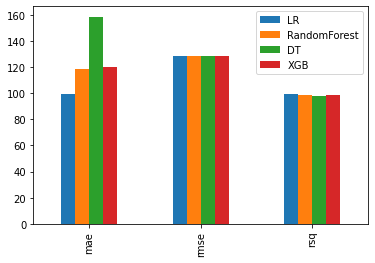

In [63]:
model_metrics ={'LR':{
'mae':mae_linear,
    #'mse':mse_linear,
    'rmse':rmse_linear,
    'rsq':rsq_linear*100
},
   'RandomForest':
               {'mae':mae_rfe,
    #'mse':mse_rfe,
    'rmse':rmse_rfe,
    'rsq':rsq_rfe*100
},
    'DT':{'mae':mae_dt,
    #'mse':mse_dt,
    'rmse':rmse_dt,
    'rsq':rsq_dt*100
},
   'DT':{'mae':mae_dt,
    #'mse':mse_dt,
    'rmse':rmse_dt,
    'rsq':rsq_dt*100
},
    'XGB':{'mae':mae_xgb,
    #'mse':mse_xgb,
    'rmse':rmse_xgb,
    'rsq':rsq_xgb*100
        
    }                
                
               
               }

pd.DataFrame(model_metrics).plot(kind='bar')
plt.show()

### Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import RepeatedKFold

In [66]:
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)

grid_params_rf1 = [{
        'model__max_depth':[15, 18, 10],
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=8)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

RF1.fit(X_train_fs, Y_train)

print('Best Congif of RFE %s' %RF1.best_params_)


print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(Y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(Y_test, y_pred_v1_rf1)))


Best Congif of RFE {'model__max_depth': 10, 'model__min_samples_split': 2}
Best MAE: -120.350
Test set mean absolute error for best params: 120.849 
Test set root mean squared error for best params: 10.993 


### Explainable AI using SHAP


In [43]:
import shap

In [44]:
shap.initjs()

## Random Forest

In [70]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X_train,Y_train)
X_train_rf = fs.transform(X_train)
X_test_rf = fs.transform(X_test)
rf_final = RandomForestRegressor(max_depth=15, min_samples_split=2, criterion='mse')

rf_final.fit(X_train_rf,Y_train)
rf_pred = rf_final.predict(X_test_rf)

In [72]:
print(mean_absolute_error(Y_test,rf_pred))
print(np.sqrt(mean_squared_error(Y_test,rf_pred)))

119.13421841839687
157.32453773177943


In [77]:
X_test_rf_df = pd.DataFrame(X_test_rf, columns=[X_train.columns[i] for i in range(len(fs.get_support())) if fs.get_support()[i]])



In [78]:
X_test_rf_df

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,12.5,0.25,0.38,0.63,79.0,55.9,0.26,0.577202,0.483356,39.923186
1,12.5,0.25,0.75,0.63,64.7,45.8,0.39,0.569936,0.476836,39.063146
2,25.0,0.25,0.75,0.63,79.0,55.9,0.10,0.507116,0.451013,36.148782
3,12.5,0.25,0.38,0.50,64.7,45.8,0.39,0.551775,0.470177,38.381627
4,25.0,0.38,0.50,0.63,79.0,55.9,0.26,0.527592,0.464639,37.782288
...,...,...,...,...,...,...,...,...,...,...
225,25.0,0.25,0.75,0.63,79.0,55.9,0.26,0.488876,0.445475,35.598217
226,12.5,0.25,0.50,0.50,71.9,50.8,0.39,0.535877,0.462697,37.555568
227,25.0,0.25,0.38,0.50,64.7,45.8,0.10,0.530917,0.463152,37.584236
228,12.5,0.25,0.25,0.38,79.0,55.9,0.26,0.512803,0.452144,36.311593


In [79]:
shap_values_rf = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)
#shap_interaction_values_rf = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)


## Feature Contribution to the prediction

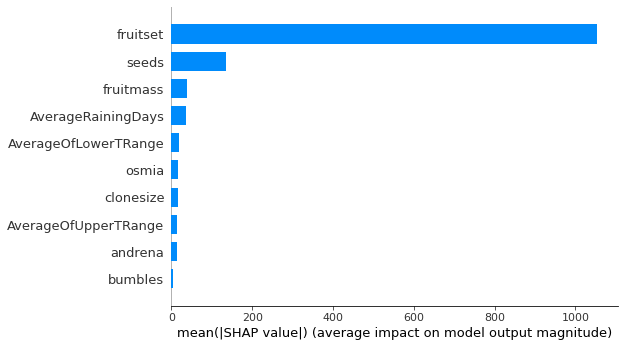

In [81]:
shap.summary_plot(shap_values_rf, X_test_rf_df, plot_type="bar")

## Directional Imapct of the features to the prediction

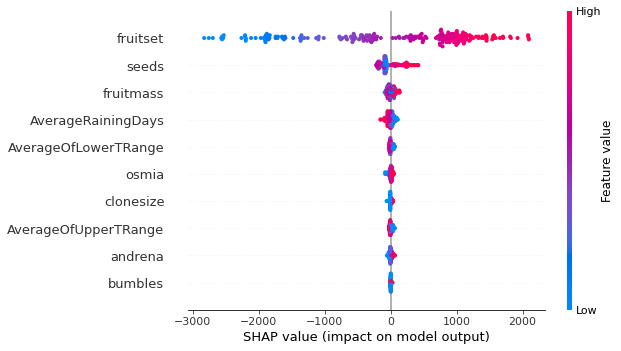

In [83]:
shap.summary_plot(shap_values_rf, X_test_rf_df)

### XGB Model

In [88]:
fs_xgb = SelectKBest(score_func=mutual_info_regression, k=10)
fs_xgb.fit(X_train,Y_train)
X_train_xgb = fs_xgb.transform(X_train)
X_test_xgb = fs_xgb.transform(X_test)
xgb_final = XGBRegressor()

xgb_final.fit(X_train_xgb, Y_train)
xgb_pred = xgb_final.predict(X_test_xgb)

In [90]:
print(mean_absolute_error(Y_test,xgb_pred))
print(np.sqrt(mean_squared_error(Y_test,xgb_pred)))

117.99208988091031
151.63504401537628


In [95]:
X_test_xgb_df =pd.DataFrame(X_test_xgb, columns=[X_test.columns[i] for i in range(len(fs_xgb.get_support())) if fs_xgb.get_support()[i]])
shap_values_xgb = shap.TreeExplainer(xgb_final).shap_values(X_test_xgb_df)


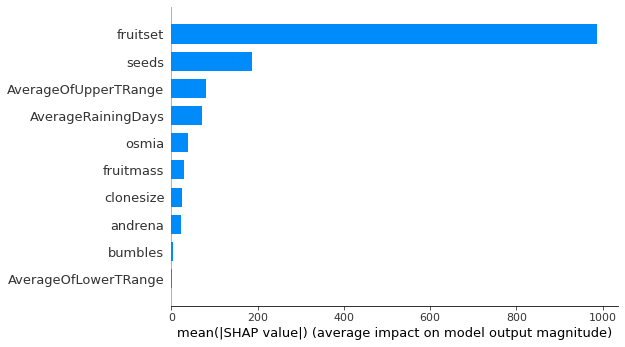

In [96]:
shap.summary_plot(shap_values_xgb, X_test_xgb_df, plot_type="bar")


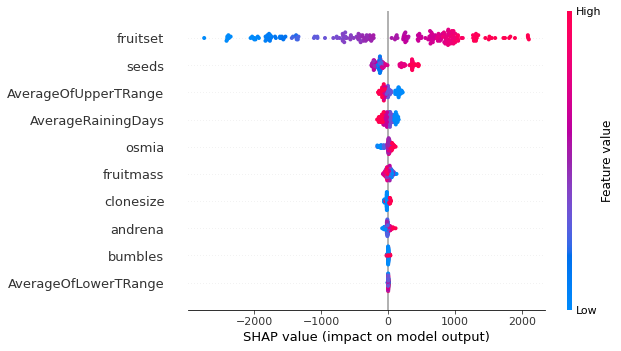

In [97]:
shap.summary_plot(shap_values_xgb, X_test_xgb_df)


#### Saving the Model

In [ ]:
! pip install joblib

In [ ]:
import joblib

joblib.dump(RF1,"F:\\TMLC\\BlueBerry Prediction\\RF1.pkl")

In [ ]:
sel_features